 1. Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


 2. Load the Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("Fake.csv")  # Replace with your uploaded filename
df.head()


3. Data Exploration

In [ ]:
print("Dataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:")
print(df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

Dataset Description:
                                                    title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46  

Missing Values:
title      0
text       0
subject    0
date       0
dtype: int64

Duplicat

4. Check for Missing Values and Duplicates

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

# Check again
df.isnull().sum(), df.duplicated().sum()

(title      0
 text       0
 subject    0
 date       0
 dtype: int64,
 np.int64(0))

5. Visualize a Few Features

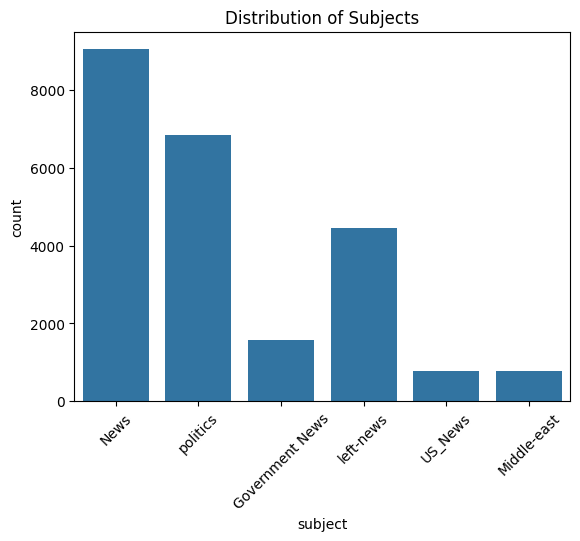

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of subjects
sns.countplot(x='subject', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Subjects")
plt.show()

6. Identify Target and Features

In [ ]:
# We'll use 'text' as feature and create a fake news label (1 = Fake)
df['label'] = 1  # Since this dataset contains only fake news, label all as 1
X = df['text']
y = df['label']


7. Convert Categorical Columns to Numerical

In [ ]:
# Not required at this point because 'text' is the only feature, and it's already textual.
# However, if needed later, we can convert 'subject' using label encoding.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['subject_encoded'] = le.fit_transform(df['subject'])

8. One-Hot Encoding

In [ ]:
# Again, not necessary here since we aren't using 'subject' directly.
# If you were using categorical features like 'subject', you'd do:
df_encoded = pd.get_dummies(df, columns=['subject'])


9. Feature Scaling

In [ ]:
# Scaling is not applied to text features. This step is skipped unless you have numeric features.
# However, we can mention it if you later add numerical features like word counts or sentiment scores.

10. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

11. Model Building

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Ensure no nulls and proper format
X_train = X_train.fillna('').astype(str)  # Ensure X_train is of string type
X_test = X_test.fillna('').astype(str)    # Ensure X_test is of string type

# Ensure y_train is a 1D array
y_train = y_train.squeeze()

# Build the model pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions (optional)
y_pred = model.predict(X_test)

# Evaluate the model (optional)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


NameError: name 'X_train' is not defined

12. Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

try:
    print("➡️ Checking X_test and y_test formats...")
    X_test = X_test.fillna('').astype(str)
    print("✅ Format OK.")

    print("➡️ Checking model training...")
    model.named_steps['clf'].coef_  # test if model is trained
    print("✅ Model is trained.")

    print("➡️ Checking length match...")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
    if len(X_test) != len(y_test):
        raise ValueError("❌ Mismatch between X_test and y_test length.")

    print("➡️ Predicting...")
    y_pred = model.predict(X_test)
    print("✅ Prediction complete.")

    print("\n🎯 Evaluation Metrics:")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

except Exception as e:
    print("🚨 ERROR OCCURRED DURING EVALUATION:")
    print(type(e).__name__, ":", e)


➡️ Checking X_test and y_test formats...
🚨 ERROR OCCURRED DURING EVALUATION:
NameError : name 'X_test' is not defined


 13. Make Predictions from New Input

In [ ]:
# Step 13: Make Predictions from New Input
new_input = ["Breaking news: NASA discovers water on Mars!"]

# Ensure input is valid
if not isinstance(new_input, list) or not all(isinstance(i, str) for i in new_input):
    raise ValueError("Input must be a list of strings")

try:
    prediction = model.predict(new_input)
    print("Prediction:", "Fake" if prediction[0] == 1 else "Real")
except Exception as e:
    print("🚨 ERROR during prediction:", type(e).__name__, "→", e)


🚨 ERROR during prediction: NameError → name 'model' is not defined


 14. Convert to DataFrame and Encode

In [ ]:
# Step 14: Convert to DataFrame and Predict

import pandas as pd

# Sample new data
new_data = [
    "New vaccine has been approved by the government",
    "Aliens have landed in California according to reports"
]

# Convert to DataFrame
new_df = pd.DataFrame(new_data, columns=['text'])

# Clean the text column
new_df['text'] = new_df['text'].fillna('').astype(str)

# Predict using your trained model
try:
    new_df['prediction'] = model.predict(new_df['text'])
    new_df['label'] = new_df['prediction'].apply(lambda x: "Fake" if x == 1 else "Real")
    print(new_df)
except Exception as e:
    print("🚨 ERROR during batch prediction:", type(e).__name__, "→", e)


🚨 ERROR during batch prediction: NameError → name 'model' is not defined


 15. Predict the Final Grade

In [ ]:
# Step 15: Predict the confidence score ("final grade")

# Make sure you define new_input correctly
new_input = ["Breaking news: NASA discovers water on Mars!"]

# Ensure model and input are ready
try:
    prob = model.predict_proba(new_input)
    print("Confidence Score (Fake):", prob[0][1])  # Probability that it's fake (label=1)
except Exception as e:
    print("🚨 ERROR during confidence prediction:", type(e).__name__, "→", e)


🚨 ERROR during confidence prediction: NameError → name 'model' is not defined


16. Deployment – Building an Interactive App

In [ ]:
!pip install gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


17. Create a Prediction Function

In [ ]:
def fake_news_predictor(text):
    pred = model.predict([text])[0]
    proba = model.predict_proba([text])[0][1]
    label = "Fake" if pred == 1 else "Real"
    return f"{label} News (Confidence: {proba:.2f})"


18. Create the Gradio Interface

In [ ]:
def fake_news_predictor(text):
    try:
        prediction = model.predict([text])[0]
        proba = model.predict_proba([text])[0][1]  # probability of being Fake
        label = "Fake" if prediction == 1 else "Real"
        return f"{label} News (Confidence: {proba:.2f})"
    except Exception as e:
        return f"❌ Error: {str(e)}"


In [ ]:
# Make sure Gradio is installed
!pip install gradio --quiet

import gradio as gr

# Your prediction function
def fake_news_predictor(text):
    try:
        prediction = model.predict([text])[0]
        proba = model.predict_proba([text])[0][1]
        label = "Fake" if prediction == 1 else "Real"
        return f"📰 Prediction: {label}\n🔍 Confidence (Fake): {proba:.2f}"
    except Exception as e:
        return f"❌ Error: {str(e)}"

# Launch the interface
iface = gr.Interface(
    fn=fake_news_predictor,
    inputs="text",
    outputs="text",
    title="🧠 Fake News Detection Chatbot",
    description="Enter a news article to check if it's Fake or Real. Powered by Logistic Regression + NLP."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d900428432d5c82bf5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
